In [48]:
print("Hello")

Hello


In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
pd.pandas.set_option("display.max_columns",None)
df=pd.read_csv("EasyVisa.csv")
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [50]:
df.shape

(25480, 12)

In [51]:
df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [52]:
features_with_na=[feature for feature in df.columns if df[feature].isnull().sum()>=1]
for feature in features_with_na:
    print(feature,np.round(df[feature].isnull().mean()*100,5),"%missing value")

In [53]:
features_with_na

[]

In [54]:
df.duplicated().sum()

0

In [55]:
df.drop('case_id',inplace=True,axis=1)

In [56]:
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [57]:
from datetime import date
todays_date=date.today()
current_year=todays_date.year

In [58]:
todays_date

datetime.date(2024, 11, 28)

In [59]:
current_year

2024

In [60]:
df['company_age']=current_year-df['yr_of_estab']

In [61]:
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,company_age
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,17
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,22
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,16
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,127
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,19


In [62]:
df.drop('yr_of_estab',inplace=True,axis=1)

In [63]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Number of Numerical columns:', len(num_features))

Number of Numerical columns: 3


In [64]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Number of categorical columns:', len(cat_features))

Number of categorical columns: 8


In [65]:
discreat_feature=[feature for feature in num_features if len(df[feature].unique())<=25]
print("Number of discreate columns :",len(discreat_feature))

Number of discreate columns : 0


In [66]:
continuous_feature=[feature for feature in num_features if len(df[feature].unique())>25]
print("Number of continuous columns :",len(continuous_feature))

Number of continuous columns : 3


In [67]:
x=df.drop('case_status',axis=1)
y=df['case_status']

In [68]:
y.head()

0       Denied
1    Certified
2       Denied
3       Denied
4    Certified
Name: case_status, dtype: object

In [69]:
y=np.where(y=='Denied',1,0)

In [70]:
y

array([1, 0, 1, ..., 0, 0, 0])

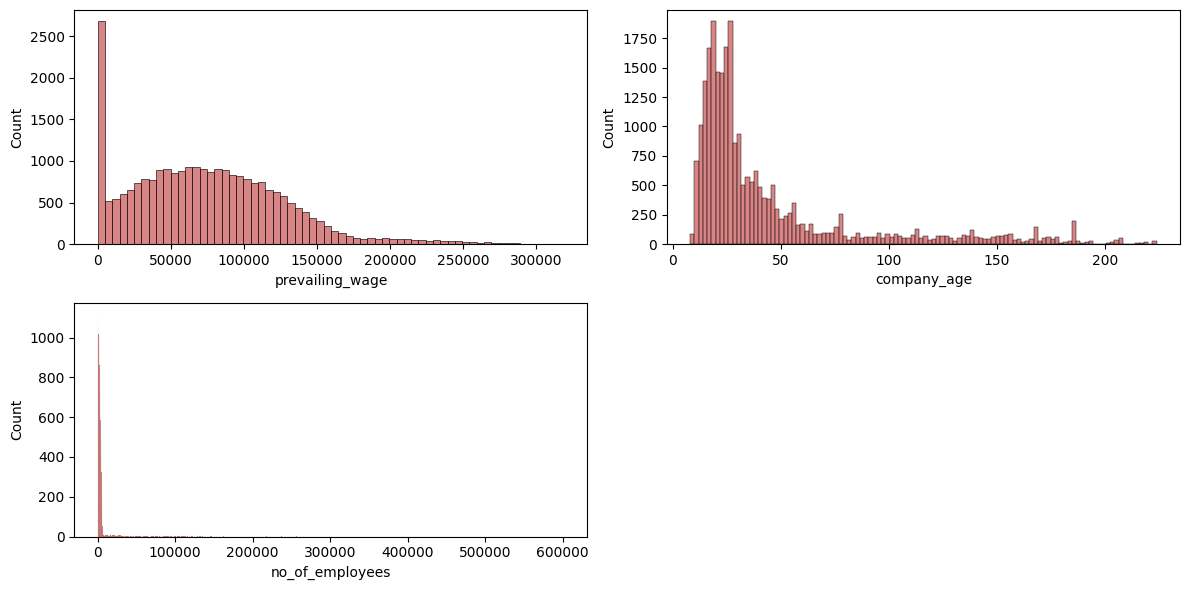

In [71]:
plt.figure(figsize=(12,6))
for i,col in enumerate(['prevailing_wage','company_age','no_of_employees']):
    plt.subplot(2,2,i+1)
    sns.histplot(x=x[col],color="indianred")
    plt.xlabel(col)
    plt.tight_layout()

In [72]:
x[continuous_feature].skew(axis=0,skipna=True)

no_of_employees    12.265260
prevailing_wage     0.755776
company_age         2.037301
dtype: float64

In [73]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson')
transform_features=['company_age','no_of_employees']
x_copy=pt.fit_transform(x[transform_features])

In [74]:
x_copy=pd.DataFrame(x_copy,columns=transform_features)

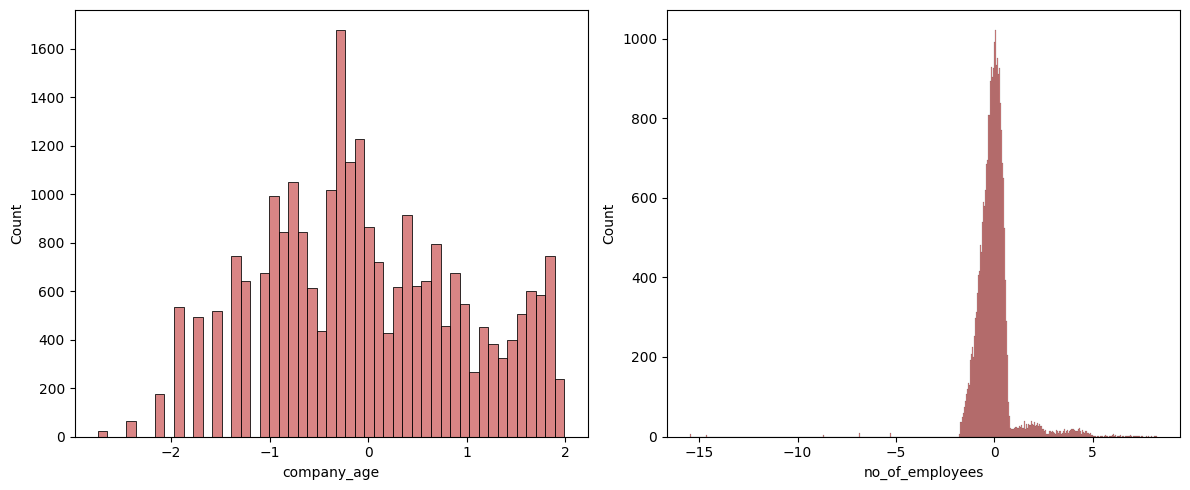

In [75]:
plt.figure(figsize=(12,5))
for i,col in enumerate(transform_features):
    plt.subplot(1,2,i+1)
    sns.histplot(x=x_copy[col],color="indianred")
    plt.xlabel(col)
    plt.tight_layout()

In [76]:
x_copy.skew(axis=0,skipna=True)

company_age        0.103265
no_of_employees    0.399339
dtype: float64

In [77]:
for feature in cat_features:
    print(feature,':',df[feature].nunique())

continent : 6
education_of_employee : 4
has_job_experience : 2
requires_job_training : 2
region_of_employment : 5
unit_of_wage : 4
full_time_position : 2
case_status : 2


In [78]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

or_columns = ['has_job_experience', 'requires_job_training', 'full_time_position', 'education_of_employee']
oh_columns = ['continent', 'unit_of_wage', 'region_of_employment']
transform_columns = ['no_of_employees', 'company_age']

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()
ordinal_encoder = OrdinalEncoder()

transform_pipe = Pipeline(steps=[
    ('power_transformer', PowerTransformer(method='yeo-johnson'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', oh_transformer, oh_columns),
        ('ordinal', ordinal_encoder, or_columns),
        ('transform', transform_pipe, transform_columns),
        ('scaler', numeric_transformer, transform_columns)
    ]
)


In [79]:
X=preprocessor.fit_transform(x)

In [80]:
X[0].shape

(23,)

In [81]:
from imblearn.combine import SMOTEENN,SMOTETomek
smt=SMOTEENN(random_state=42,sampling_strategy='minority')
x_res,y_res=smt.fit_resample(X,y)

In [82]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=0.2,random_state=42)
x_train.shape

(13040, 23)

In [83]:
x_test.shape

(3260, 23)

In [84]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,precision_score,recall_score,f1_score,roc_auc_score,roc_curve
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [85]:
def evaluate_clf(true,predicted):
    acc=accuracy_score(true,predicted)
    f1=f1_score(true,predicted)
    precision=precision_score(true,predicted)
    recall=recall_score(true,predicted)
    roc_score=roc_auc_score(true,predicted)
    return acc,f1,precision,recall,roc_score

In [86]:
models={
    "Random Forest":RandomForestClassifier(),
    "Decision Tree":DecisionTreeClassifier(),
    "Gradient Boosting":GradientBoostingClassifier(),
    "Logistic Regression":LogisticRegression(),
    "K-Neighbors classfier":KNeighborsClassifier(),
    "XGB Classifier":XGBClassifier(),
    "CatBoosting Classifier":CatBoostClassifier(),
    "Support vector classifier":SVC(),
    "AdaBoost Classifier":AdaBoostClassifier()
}

In [87]:
def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    
    models_list = []
    accuracy_list = []
    auc= []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred)


        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)
        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1)) 
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        accuracy_list.append(model_test_accuracy)
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        auc.append(model_test_rocauc_score)
        print('='*35)
        print('\n')
        
    report=pd.DataFrame(list(zip(models_list, accuracy_list)), columns=['Model Name', 'Accuracy']).sort_values(by=['Accuracy'], ascending=False)
    return report

In [88]:
base_model_report=evaluate_models(X=x_res,y=y_res,models=models)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9669
- F1 score: 0.9683
- Precision: 0.9677
- Recall: 0.9688
- Roc Auc Score: 0.9668


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9405
- F1 score: 0.9435
- Precision: 0.9353
- Recall: 0.9518
- Roc Auc Score: 0.9400


Gradient Boosting
Model performance for Training set
- Accuracy: 0.9025
- F1 score: 0.9053
- Precision: 0.9113
- Recall: 0.8993
- Roc Auc Score: 0.9027
----------------------------------
Model performance for Test set
- Accuracy: 0.8963
- F1 score: 0.9002
- Precision: 0.9045
- Recall: 0.8959
- Roc Auc Score: 0.8963


Logistic Regression
Model performance for Training 

/home/kmsingh/anaconda3/envs/visa/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Classifier
Model performance for Training set
- Accuracy: 0.8633
- F1 score: 0.8682
- Precision: 0.8669
- Recall: 0.8696
- Roc Auc Score: 0.8630
----------------------------------
Model performance for Test set
- Accuracy: 0.8589
- F1 score: 0.8640
- Precision: 0.8691
- Recall: 0.8589
- Roc Auc Score: 0.8589




In [89]:
xgboost_params={
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2)
}

rf_params={
    "max_depth":[10,12,None,15,20],
    "max_features":['sqrt','log2','None'],
    "n_estimators":[10,50,100,200]
}

knn_params={
    'algorithm':['auto','ball_tree','kd_tree','brute'],
    'weights':['uniform','distance'],
    'n_neighbors':[3,4,5,7,9]
}

In [90]:
randomcv_models = [
    ('XGBoost', XGBClassifier(), xgboost_params),
    ("RF", RandomForestClassifier(), rf_params),
    ("KNN", KNeighborsClassifier(), knn_params)
]

In [94]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2, 
                                   n_jobs=-1)
    random.fit(x_res, y_res)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

/home/kmsingh/anaconda3/envs/visa/lib/python3.12/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 12 is smaller than n_iter=100. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END ....................max_depth=3, min_child_weight=1; total time=   0.5s
[CV] END ....................max_depth=3, min_child_weight=3; total time=   0.5s
[CV] END ....................max_depth=3, min_child_weight=1; total time=   0.7s
[CV] END ....................max_depth=3, min_child_weight=1; total time=   0.7s
[CV] END ....................max_depth=3, min_child_weight=3; total time=   0.2s
[CV] END ....................max_depth=3, min_child_weight=3; total time=   0.5s
[CV] END ....................max_depth=3, min_child_weight=5; total time=   0.4s
[CV] END ....................max_depth=3, min_child_weight=5; total time=   0.5s
[CV] END ....................max_depth=5, min_child_weight=1; total time=   0.4s
[CV] END ....................max_depth=3, min_child_weight=5; total time=   0.7s
[CV] END ....................max_depth=5, min_child_weight=3; total time=   0.4s
[CV] END ....................max_depth=5, min_ch

/home/kmsingh/anaconda3/envs/visa/lib/python3.12/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 60 is smaller than n_iter=100. Running 60 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 60 candidates, totalling 180 fits
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=10; total time=   0.1s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=10; total time=   0.1s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=10; total time=   0.1s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.6s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.8s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.7s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   1.6s
[CV] END ...max_depth=10, max_features=log2, n_estimators=10; total time=   0.2s
[CV] END ...max_depth=10, max_features=log2, n_estimators=10; total time=   0.2s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=100; total time=   1.3s
[CV] END ...max_depth=10, max_features=log2, n_estimators=10; total time=   0.1s
[CV] END ..max_depth=10, max_features=sqrt, n_e

/home/kmsingh/anaconda3/envs/visa/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/home/kmsingh/anaconda3/envs/visa/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/kmsingh/anaconda3/envs/visa/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/home/kmsingh/anaconda3/envs/visa/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    va

Fitting 3 folds for each of 40 candidates, totalling 120 fits
[CV] END ....algorithm=auto, n_neighbors=3, weights=distance; total time=   0.6s
[CV] END .....algorithm=auto, n_neighbors=3, weights=uniform; total time=   0.7s
[CV] END .....algorithm=auto, n_neighbors=3, weights=uniform; total time=   0.8s
[CV] END .....algorithm=auto, n_neighbors=3, weights=uniform; total time=   0.9s
[CV] END ....algorithm=auto, n_neighbors=3, weights=distance; total time=   0.9s
[CV] END ....algorithm=auto, n_neighbors=3, weights=distance; total time=   0.9s
[CV] END .....algorithm=auto, n_neighbors=4, weights=uniform; total time=   0.8s
[CV] END .....algorithm=auto, n_neighbors=4, weights=uniform; total time=   1.0s
[CV] END .....algorithm=auto, n_neighbors=4, weights=uniform; total time=   0.8s
[CV] END ....algorithm=auto, n_neighbors=4, weights=distance; total time=   1.0s
[CV] END ....algorithm=auto, n_neighbors=4, weights=distance; total time=   1.0s
[CV] END ....algorithm=auto, n_neighbors=4, wei

In [95]:
model_param

{'XGBoost': {'min_child_weight': 1, 'max_depth': 9},
 'RF': {'n_estimators': 200, 'max_features': 'log2', 'max_depth': None},
 'KNN': {'weights': 'distance', 'n_neighbors': 3, 'algorithm': 'auto'}}

In [97]:
from sklearn.metrics import roc_auc_score,roc_curve
best_models = {
    "Random Forest Classifier": RandomForestClassifier(**model_param['RF']),
    "KNeighborsClassifier": KNeighborsClassifier(**model_param['KNN']),
    "XGBClassifier": XGBClassifier(**model_param['XGBoost'],n_jobs=-1),
}
tuned_report =evaluate_models(X=x_res, y=y_res, models=best_models)

Random Forest Classifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9660
- F1 score: 0.9674
- Precision: 0.9660
- Recall: 0.9688
- Roc Auc Score: 0.9658


KNeighborsClassifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9779
- F1 score: 0.9789
- Precision: 0.9738
- Recall: 0.9841
- Roc Auc Score: 0.9776


XGBClassifier
Model performance for Training set
- Accuracy: 0.9985
- F1 score: 0.9985
- Precision: 0.9984
- Recall: 0.9987
- Roc Auc Score: 0.9985
----------------------------------
Model performance for Test set
- Accuracy: 0.9537
- F1 score: 0.9558
- Precision: 0.9522
- Recall: 0.9594
- Roc Auc Score: 0.9534




In [98]:
tuned_report

,Model Name,Accuracy
1,KNeighborsClassifier,0.977914
0,Random Forest Classifier,0.965951
2,XGBClassifier,0.953681


In [101]:
best_model = KNeighborsClassifier(**model_param['KNN'])
best_model = best_model.fit(x_train,y_train)
y_pred = best_model.predict(x_test)
score = accuracy_score(y_test,y_pred)
cr = classification_report(y_test,y_pred)

print("FINAL MODEL 'KNN'")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

FINAL MODEL 'KNN'
Accuracy Score value: 0.9779
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1559
           1       0.97      0.98      0.98      1701

    accuracy                           0.98      3260
   macro avg       0.98      0.98      0.98      3260
weighted avg       0.98      0.98      0.98      3260



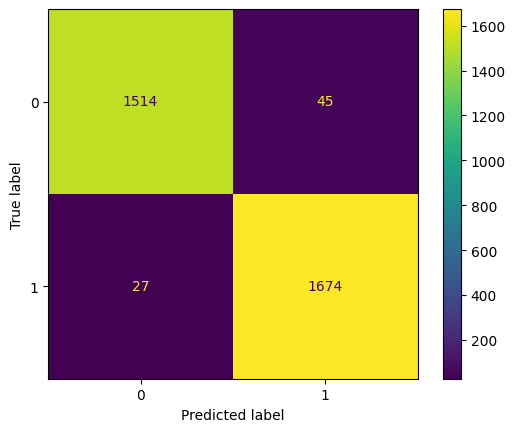

In [103]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_model, x_test, y_test)

Best Model is K-Nearest Neighbors (KNN) with 97.79% accuracy